<a href="https://colab.research.google.com/github/Udhay2898/Real-Fake-Job-Posting-Prediction/blob/Master/Food_and_Beverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/fact_survey_responses.csv')
df1.sample(3)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
7110,110111,127141,Once a week,To stay awake during work/study,To enhance sports performance,Yes,Neutral,Effective,Yes,3,...,Healthier alternatives,Caffeine,No,No,Online ads,Eco-friendly design,No,50-99,Gyms and fitness centers,Sports/exercise
6249,109250,126280,2-3 times a week,Before exercise,Increased energy and focus,Yes,Neutral,Not sure,Yes,2,...,Healthier alternatives,Caffeine,No,Yes,TV commercials,Collectible packaging,No,50-99,Supermarkets,Studying/working late
8308,111309,128339,2-3 times a month,To stay awake during work/study,To combat fatigue,No,Positive,Not sure,No,3,...,Reduced sugar content,Sugar,Yes,No,Other,Innovative bottle design,Yes,100-150,Online retailers,Studying/working late


In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_repondents.csv')
df2.sample(3)

,Respondent_ID,Name,Age,Gender,City_ID
8712,128743,Indrajit Ahluwalia,19-30,Female,CT113
2324,122355,Anya Sura,19-30,Male,CT115
5485,125516,Yasmin Sarma,19-30,Male,CT111


In [5]:
df3 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_cities.csv')
df3.sample(3)

,City_ID,City,Tier
7,CT118,Pune,Tier 2
5,CT116,Hyderabad,Tier 1
1,CT112,Mumbai,Tier 1


In [6]:
merged_df = pd.merge(df2, df3, on='City_ID')

merged_df.sample(10)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
6813,124129,Jivin Raju,19-30,Female,CT112,Mumbai,Tier 1
2297,125041,Sara Dar,19-30,Male,CT116,Hyderabad,Tier 1
3646,121674,Divit Wadhwa,19-30,Male,CT113,Bangalore,Tier 1
1307,129510,Pihu Dube,31-45,Male,CT118,Pune,Tier 2
5649,128729,Siya Viswanathan,19-30,Female,CT113,Bangalore,Tier 1
8829,125223,Vanya Gupta,19-30,Male,CT119,Jaipur,Tier 2
5612,128642,Jayan Varma,31-45,Male,CT113,Bangalore,Tier 1
6674,123299,Samaira Varughese,31-45,Male,CT112,Mumbai,Tier 1
9394,127081,Yashvi Chander,19-30,Female,CT115,Kolkata,Tier 2
2059,123746,Kavya Madan,15-18,Male,CT116,Hyderabad,Tier 1


In [7]:
df = pd.merge(merged_df,df1,on = 'Respondent_ID')

df.sample(1)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
7536,128981,Kabir Shere,31-45,Non-binary,CT112,Mumbai,Tier 1,111951,2-3 times a week,To stay awake during work/study,...,Healthier alternatives,Vitamins,Yes,Yes,Online ads,Eco-friendly design,Yes,50-99,Local stores,Sports/exercise


In [8]:
# Exploring Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   10000 non-null  int64 
 1   Name                            10000 non-null  object
 2   Age                             10000 non-null  object
 3   Gender                          10000 non-null  object
 4   City_ID                         10000 non-null  object
 5   City                            10000 non-null  object
 6   Tier                            10000 non-null  object
 7   Response_ID                     10000 non-null  int64 
 8   Consume_frequency               10000 non-null  object
 9   Consume_time                    10000 non-null  object
 10  Consume_reason                  10000 non-null  object
 11  Heard_before                    10000 non-null  object
 12  Brand_perception                10000 non-null 

In [9]:
df.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [10]:
# Assuming df is your DataFrame
columns_order = [
    'Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
    'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
    'Heard_before', 'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
    'Current_brands', 'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
    'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
    'Interest_in_natural_or_organic', 'Marketing_channels', 'Packaging_preference',
    'Limited_edition_packaging', 'Price_range', 'Purchase_location', 'Typical_consumption_situations'
]

# Reordering the DataFrame columns
df = df[columns_order]

df.sample(2)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
329,127310,Prisha Balakrishnan,31-45,Male,CT117,Ahmedabad,Tier 2,110280,Rarely,For mental alertness,...,Reduced sugar content,Vitamins,Yes,Yes,Print media,Collectible packaging,Yes,50-99,Supermarkets,Sports/exercise
9638,121607,Nirvi Thaman,15-18,Female,CT111,Delhi,Tier 1,104577,Rarely,Before exercise,...,Wider range of flavors,Sugar,No,Yes,TV commercials,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise


In [11]:
df.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
       'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [12]:
# Drop the 'job_id' column
df = df.drop(columns=['Respondent_ID', 'City_ID', 'Response_ID'])

df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
8140,Azad Hari,46-65,Female,Chennai,Tier 1,2-3 times a week,For mental alertness,To boost performance,No,No,...,Wider range of flavors,Caffeine,No,Yes,Print media,Eco-friendly design,Yes,Below 50,Supermarkets,Sports/exercise
8812,Tejas Ray,19-30,Non-binary,Jaipur,Tier 2,Once a week,Throughout the day,To enhance sports performance,Yes,Yes,...,Wider range of flavors,Caffeine,Yes,No,Outdoor billboards,Collectible packaging,Yes,50-99,Supermarkets,Social outings/parties


In [13]:
for column in df.columns:
  unique_value = df[column].unique()
  print(f"{column} :\n {unique_value}\n")

Name :
 ['Aniruddh Issac' 'Umang Sarkar' 'Kanav Thaman' ... 'Rhea Mani'
 'Rhea D?lia' 'Nirvi Golla']

Age :
 ['15-18' '31-45' '19-30' '65+' '46-65']

Gender :
 ['Female' 'Non-binary' 'Male']

City :
 ['Ahmedabad' 'Pune' 'Hyderabad' 'Bangalore' 'Lucknow' 'Mumbai' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi']

Tier :
 ['Tier 2' 'Tier 1']

Consume_frequency :
 ['2-3 times a week' 'Once a week' 'Daily' 'Rarely' '2-3 times a month']

Consume_time :
 ['To stay awake during work/study' 'Before exercise' 'Throughout the day'
 'For mental alertness']

Consume_reason :
 ['Increased energy and focus' 'To enhance sports performance'
 'To boost performance' 'Other' 'To combat fatigue']

Heard_before :
 ['Yes' 'No']

Tried_before :
 ['No' 'Yes']

Taste_experience :
 [5 3 2 4 1]

Reasons_preventing_trying :
 ['Unfamiliar with the brand' 'Not available locally'
 'Not interested in energy drinks' 'Health concerns' 'Other']

Current_brands :
 ['Blue Bull' 'Cola-Coka' 'Gangster' 'Others' 'Bepsi' 'CodeX' 'Sky 9'

In [14]:
df.nunique()

,0
Name,9487
Age,5
Gender,3
City,10
Tier,2
Consume_frequency,5
Consume_time,4
Consume_reason,5
Heard_before,2
Tried_before,2


In [15]:
df.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

,0
Name,object
Age,object
Gender,object
City,object
Tier,object
Consume_frequency,object
Consume_time,object
Consume_reason,object
Heard_before,object
Tried_before,object


In [18]:
df.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [19]:
df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
8876,Devansh Khare,19-30,Male,Jaipur,Tier 2,2-3 times a month,Before exercise,To combat fatigue,No,No,...,Healthier alternatives,Sugar,No,No,Outdoor billboards,Compact and portable cans,Not Sure,50-99,Gyms and fitness centers,Sports/exercise
4758,Shanaya Sengupta,19-30,Female,Bangalore,Tier 1,2-3 times a month,To stay awake during work/study,To combat fatigue,No,Yes,...,Wider range of flavors,Vitamins,Yes,Yes,Online ads,Innovative bottle design,No,50-99,Supermarkets,Social outings/parties


In [20]:
age_df = df.pivot_table(index='Age', columns='Gender', aggfunc='size', fill_value=0)

age_df

Gender,Female,Male,Non-binary
Age,,,
15-18,516,903,69
19-30,1891,3337,292
31-45,834,1435,107
46-65,138,261,27
65+,76,102,12


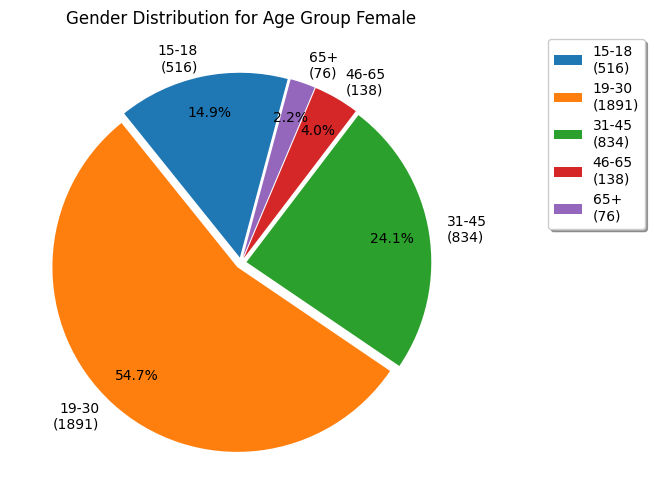

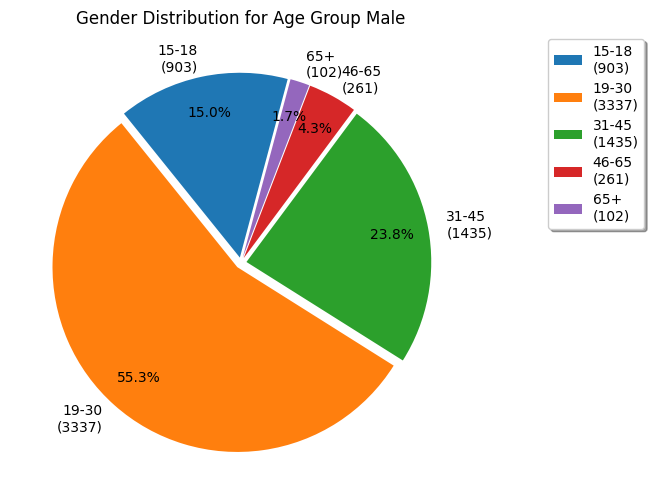

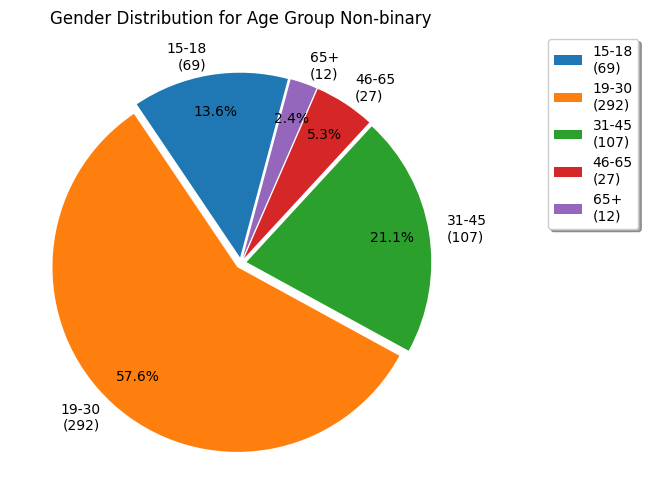

In [21]:
for age_group in age_df.columns:
    # Extract data for the current age group
    selected_age_group = age_df[age_group]

    # Extracting the counts (values) and labels (genders) for the pie chart
    pie_values = selected_age_group.values
    pie_labels = selected_age_group.index

    # Labels with counts
    labels_with_counts = [f'{label}\n({count})' for label, count in zip(pie_labels, pie_values)]

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(pie_values, labels=labels_with_counts, autopct='%1.1f%%', startangle=75,
            explode=[0.03] * len(pie_values), pctdistance=0.8)

    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
    plt.title(f'Gender Distribution for Age Group {age_group}')

    plt.show()


In [22]:
df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
8548,Divyansh Wagle,19-30,Male,Chennai,Tier 1,Daily,For mental alertness,Increased energy and focus,No,No,...,Reduced sugar content,Caffeine,No,Yes,Online ads,Innovative bottle design,No,Below 50,Supermarkets,Sports/exercise
7477,Tiya Sodhi,46-65,Male,Mumbai,Tier 1,2-3 times a month,To stay awake during work/study,Increased energy and focus,Yes,No,...,Other,Guarana,Yes,Yes,TV commercials,Innovative bottle design,Yes,Above 150,Supermarkets,Sports/exercise


In [23]:
city_count = df['City'].value_counts()

city_count

,count
City,
Bangalore,2828
Hyderabad,1833
Mumbai,1510
Chennai,937
Pune,906
Kolkata,566
Ahmedabad,456
Delhi,429
Jaipur,360


In [28]:
city_df = df.pivot_table(index='City', columns='Consume_frequency', aggfunc='size', fill_value=0)

city_df.head(2)

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
City,,,,,
Ahmedabad,36,91,26,131,172
Bangalore,562,1432,302,272,260


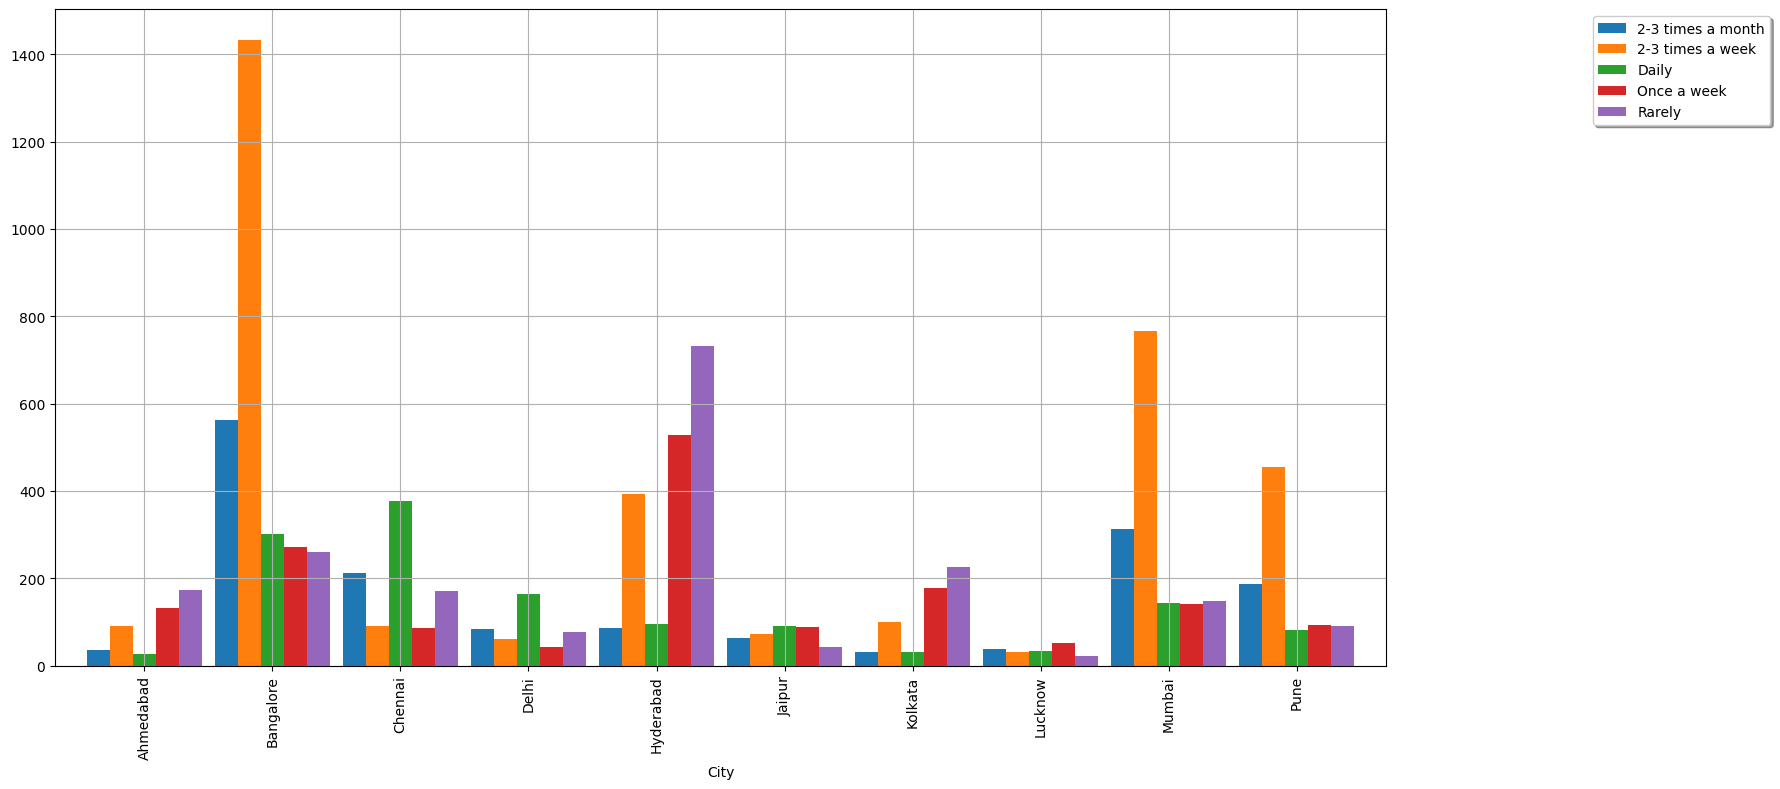

In [38]:
bar_width = 0.9
city_df.plot.bar(figsize = (18,8),grid = True,width=bar_width)

tick = range(len(city_df))
plt.xticks(ticks=tick, labels=city_df.index, rotation=90)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

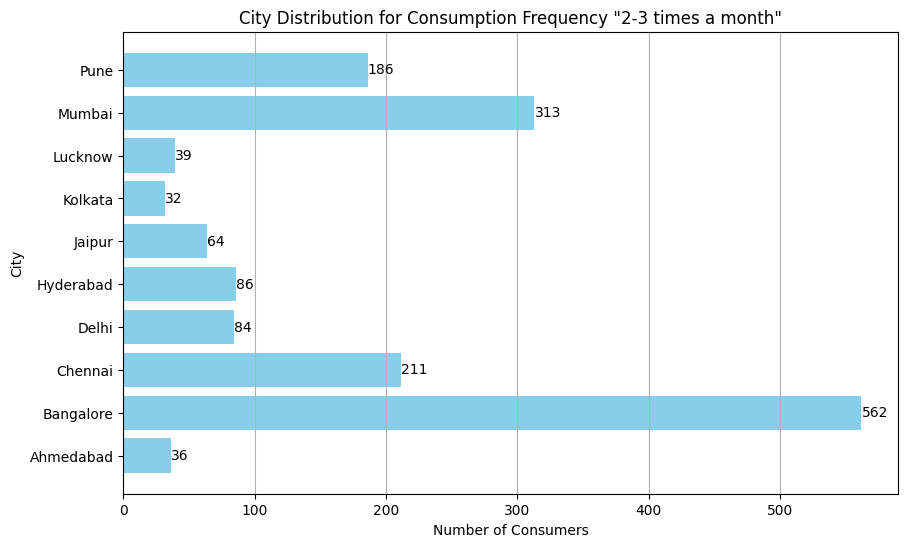

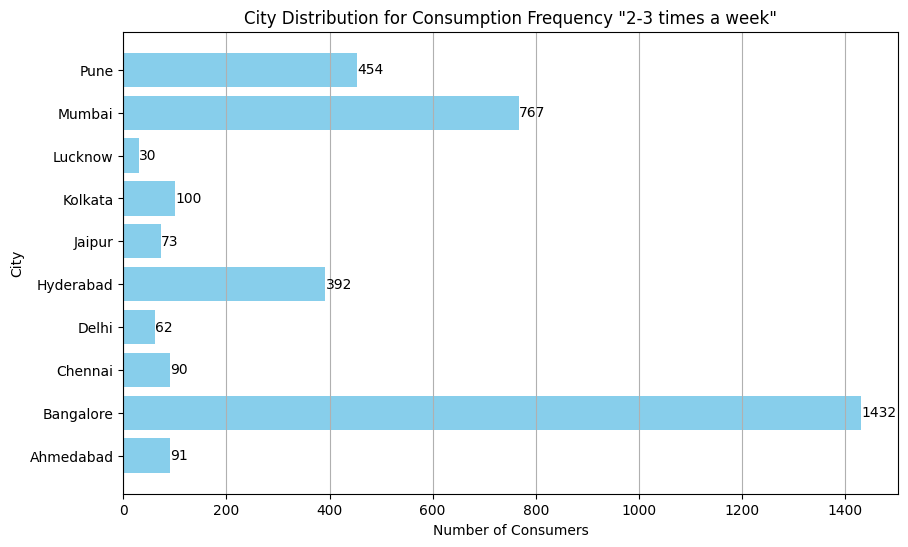

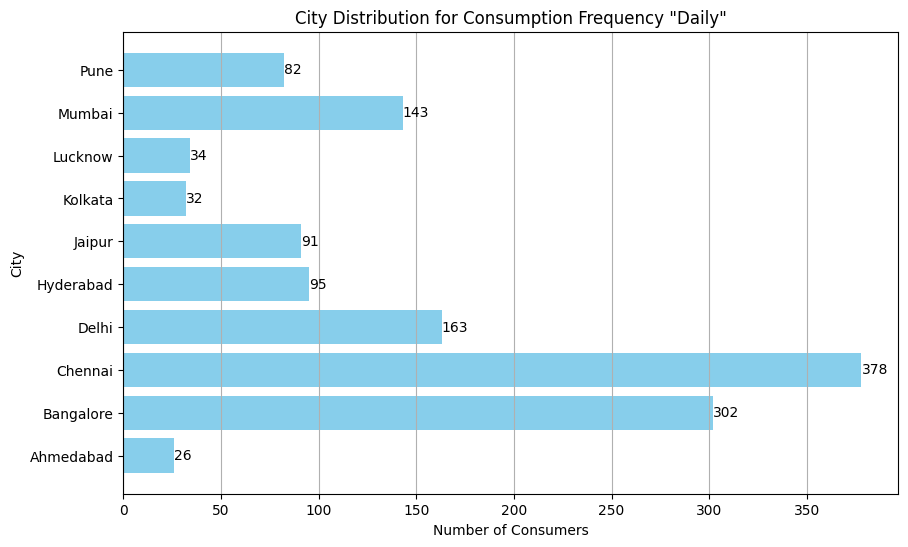

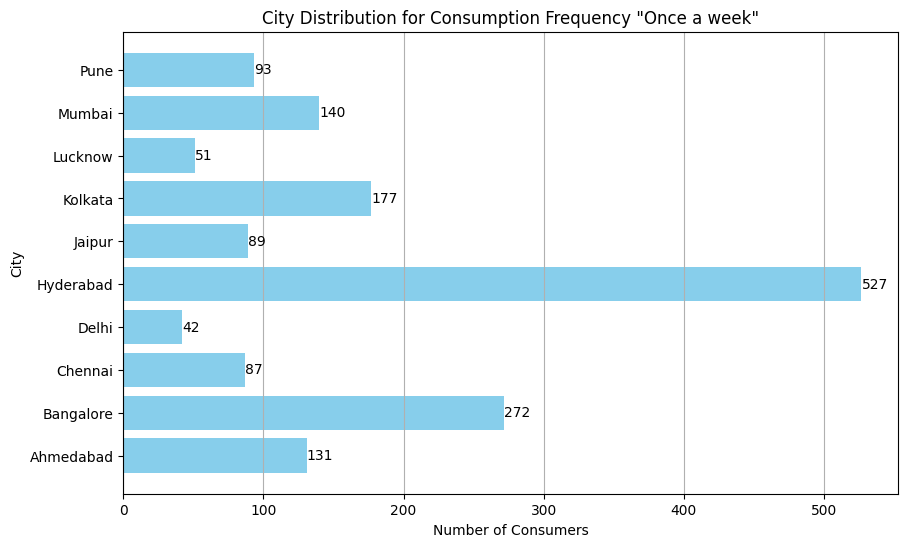

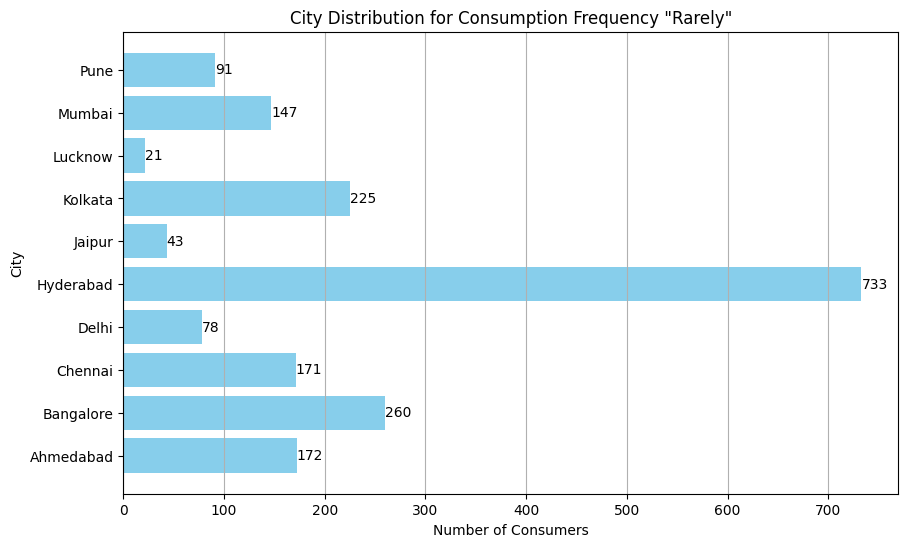

In [31]:
for frequency in city_df.columns:
    selected_frequency = city_df[frequency]

    bar_values = selected_frequency.values
    bar_labels = selected_frequency.index

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(bar_labels, bar_values, color='skyblue')

    # Add data labels to each bar
    for i in range(len(bar_values)):
        plt.text(bar_values[i], i, f'{bar_values[i]}', ha='left', va='center')

    plt.xlabel('Number of Consumers')
    plt.ylabel('City')
    plt.title(f'City Distribution for Consumption Frequency "{frequency}"')
    plt.grid(axis='x')

    plt.show()